In [7]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Input
from PIL import Image

In [24]:
import json
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Đường dẫn
train_dir = 'D:/DatasetDoAnCoSO/CK+/CK+_dataset'
BATCH_SIZE = 96
img_size = 96  # Kích thước ảnh đầu vào
# Tạo ImageDataGenerator cho tập huấn luyện và tập kiểm tra
train_datagen = ImageDataGenerator(#rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         #zoom_range = 0.2,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)
validation_generator = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

Found 646 images belonging to 6 classes.


Found 158 images belonging to 6 classes.


In [30]:
import os

DIRECTORY = 'D:/DatasetDoAnCoSO/CK+/CK+_dataset'

def find_Class(directory):
    if not os.path.exists(directory):
        raise ValueError(f"Directory '{directory}' does not exist.")
    class_names = os.listdir(directory)
    class_names = sorted(class_names)  # Sắp xếp tên lớp
    return class_names

# Gọi hàm và in kết quả
class_names = find_Class(DIRECTORY)
print("Class names:", class_names)


Class names: ['anrgy', 'fear', 'happy', 'neutral', 'sadness', 'surprise']


In [ ]:
data=[]

for categories in CATAGORIES:
    folder=os.path.join(DIRECTORY,categories)
    label=CATAGORIES.index(categories)
    
    
    for img in os.listdir(folder):
        img=os.path.join(folder,img)
        img_arr=cv2.imread(img)
        if img_arr is not None:  # Check if the image is successfully loaded
            img_arr = cv2.resize(img_arr, (100, 100))
            data.append([img_arr, label])
        else:
            print(f"Failed to load image {img}")
len(data)
import random   
random.shuffle(data)
X = []
Y = []
for features, label in data:
    X.append(features)
    Y.append(label)
X = np.array(X).reshape(-1, 100, 100, 3)
Y = np.array(Y)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Chuyển đổi nhãn thành one-hot encoding
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=len(class_names))
Y_test = tf.keras.utils.to_categorical(Y_test, num_classes=len(class_names))


In [15]:
from imblearn.over_sampling import RandomOverSampler
# Reshape the pixel data and apply oversampling
model = Sequential([
    Input(shape=(100, 100, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    
    Dense(len(class_names), activation='softmax')
    
])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 100, 100, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 100, 100, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 50, 50, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 25, 25, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 25, 25, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,814,534 (18.37 MB)

 Trainable params: 4,814,086 (18.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [16]:
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt# Biên dịch mô hình
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

callbacks = [
    ModelCheckpoint('model.h5', save_best_only=True, monitor='val_loss', mode='min'),
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
]  

# Huấn luyện mô hình
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    callbacks=[callbacks],
    epochs=50
)

Epoch 1/50


KeyboardInterrupt: 

Epoch 1/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - accuracy: 0.2183 - loss: 1.9750
Epoch 1: val_accuracy improved from -inf to 0.15333, saving model to best_model.keras
42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 239ms/step - accuracy: 0.2197 - loss: 1.9699 - val_accuracy: 0.1533 - val_loss: 1.8304 - learning_rate: 1.0000e-04
Epoch 2/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.4666 - loss: 1.3854
Epoch 2: val_accuracy did not improve from 0.15333
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 226ms/step - accuracy: 0.4679 - loss: 1.3835 - val_accuracy: 0.1533 - val_loss: 2.1066 - learning_rate: 1.0000e-04
Epoch 3/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 0.6174 - loss: 1.0333
Epoch 3: val_accuracy did not improve from 0.15333
42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 223ms/step - accuracy: 0.6178 - loss: 1.0326 - val_accuracy: 0.1533 - val_loss: 2.4903 - learning_rate: 1.0000e-04
Epoch 4/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.6995 - loss: 0.8342
Epoch 4: val_accuracy did n

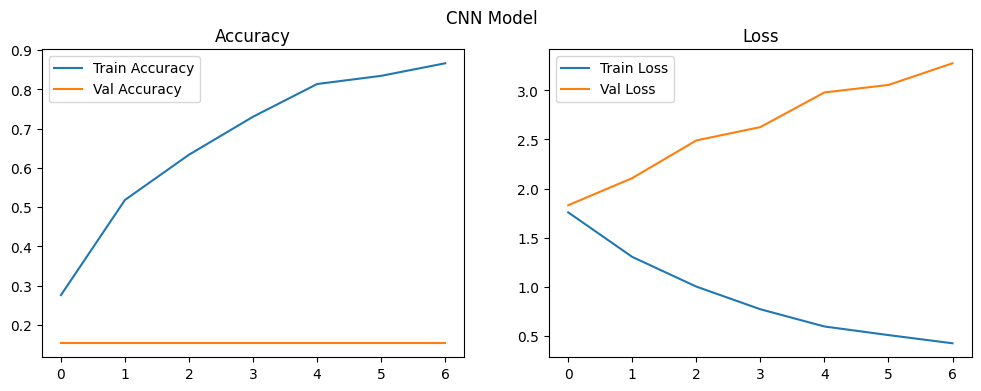

In [17]:
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Compile model
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_accuracy',
    save_weights_only=False,
    save_best_only=True,
    mode='max',
    save_freq='epoch',
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=6,
    verbose=1,
    mode='min',
    restore_best_weights=True
)

learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=0.00001,
    verbose=1
)

# Train model
history = model.fit(
    x_train, y_train,
    epochs=200,
    validation_data=(x_test, y_test),
    callbacks=[checkpoint, early_stopping, learning_rate_reduction],
    shuffle=True,
    verbose=1
)

# Evaluate
loss, acc = model.evaluate(x_test, y_test)
print(f"Accuracy of our model on test data: {acc * 100:.2f} %")
print(f"Loss of our model on test data: {loss:.4f}")

# Save model
model.save('Model_CNN.keras')

# Plot
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.suptitle("CNN Model")
plt.show()
